In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data = pd.read_csv('ecommerce_data.csv')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        907 non-null    object 
 1   Customer_ID     922 non-null    object 
 2   Product_ID      902 non-null    object 
 3   Product_Name    903 non-null    object 
 4   Category        895 non-null    object 
 5   Price           884 non-null    float64
 6   Quantity        909 non-null    float64
 7   Order_Date      908 non-null    object 
 8   Delivery_Date   807 non-null    object 
 9   Payment_Method  895 non-null    object 
dtypes: float64(2), object(8)
memory usage: 78.3+ KB


In [96]:
cleaned_data = data.dropna(subset=['Price'])
cleaned_data = data.dropna(subset=['Quantity'])
cleaned_data = data.dropna(subset=['Product_Name'])

In [97]:
#Berapa rata-rata harga produk yang terjual?

average_price = cleaned_data['Price'].mean()
average_price

526.651125

In [98]:
product_sales = cleaned_data.groupby('Product_Name')['Quantity'].sum().reset_index()

In [99]:
#Berapa produk terjual dengan jumlah tertinggi?

product_sales_sorted = product_sales.sort_values(by='Quantity', ascending=False)
print(product_sales_sorted.head())

    Product_Name  Quantity
499         such      33.0
30        answer      32.0
473        sound      30.0
314      morning      27.0
298   management      26.0


C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\3922791062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='Product_Name', data=product_sales.head(), palette='viridis')


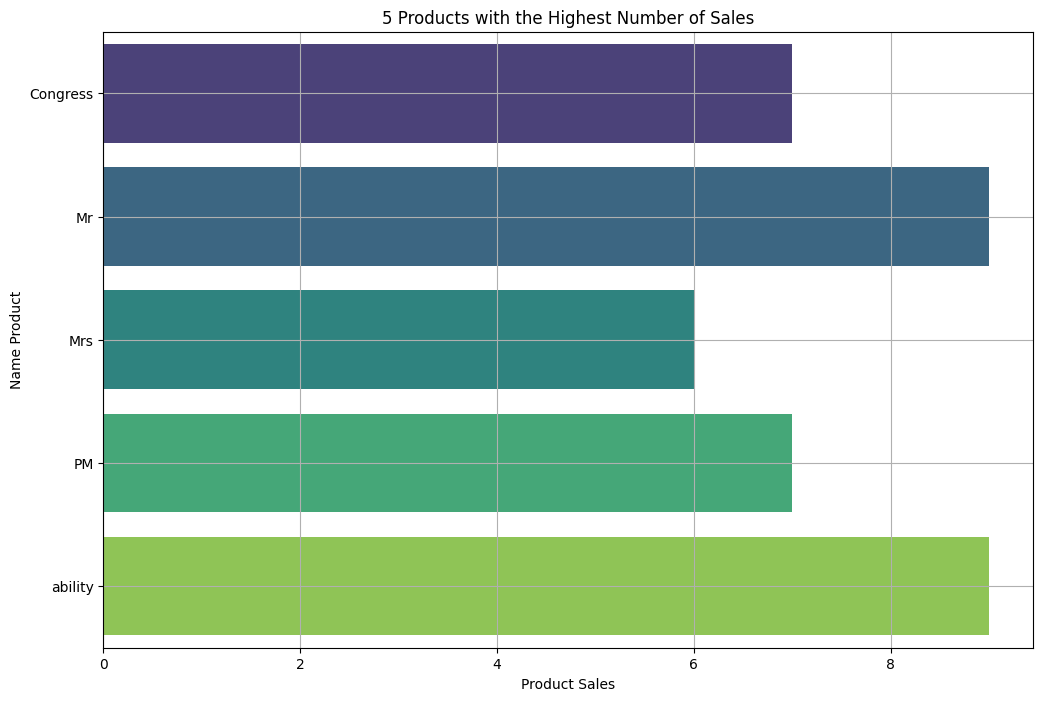

In [100]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Product_Name', data=product_sales.head(), palette='viridis')
plt.title('5 Products with the Highest Number of Sales')
plt.xlabel('Product Sales')
plt.ylabel('Name Product')
plt.grid(True)
plt.show()

In [101]:
cleaned_data = data.dropna(subset=['Category'])
avg_price_by_category = cleaned_data.groupby('Category')['Price'].mean()

In [102]:
#Apa kategori produk yang memiliki rata-rata harga tertinggi?

avg_price_by_category = cleaned_data.groupby('Category')['Price'].mean().reset_index()
highest_avg_price_category = avg_price_by_category.sort_values(by='Price', ascending=False)

print(highest_avg_price_category)

    Category   Price
321   myself  999.34
311   moment  992.76
133    dream  989.53
179      fly  985.51
280     long  982.65
..       ...     ...
522      top     NaN
531    trial     NaN
539     view     NaN
552    which     NaN
566   within     NaN

[577 rows x 2 columns]


C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\2425379867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Category', data=highest_avg_price_category.head(5), palette='viridis')


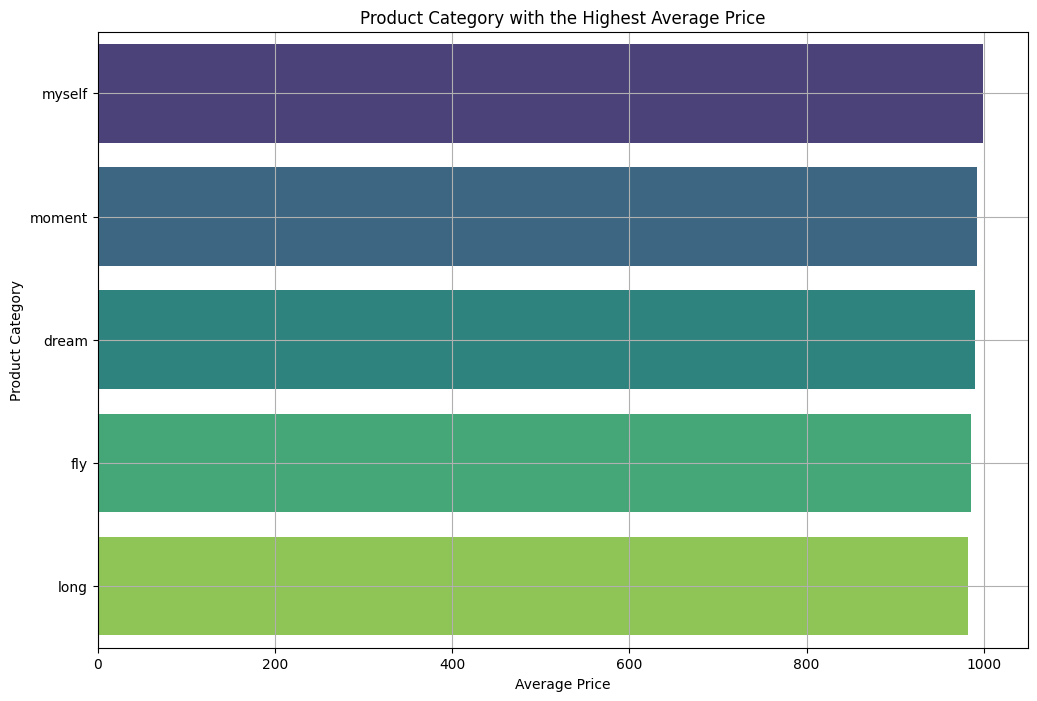

In [103]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Category', data=highest_avg_price_category.head(5), palette='viridis')
plt.title('Product Category with the Highest Average Price')
plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.grid(True)
plt.show()

In [104]:
cleaned_data = data.dropna(subset=['Order_Date'])
cleaned_data['Order_Date'] = pd.to_datetime(data['Order_Date'])

C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\240650621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Order_Date'] = pd.to_datetime(data['Order_Date'])


In [105]:

cleaned_data['Year'] = cleaned_data['Order_Date'].dt.year
cleaned_data['Month'] = cleaned_data['Order_Date'].dt.month

C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\430494016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Year'] = cleaned_data['Order_Date'].dt.year
C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\430494016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Month'] = cleaned_data['Order_Date'].dt.month


In [106]:
#Bagaimana tren penjualan dari bulan ke bulan?

monthly_sales = cleaned_data.groupby(['Year', 'Month'])['Quantity'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month'])

print(monthly_sales)

    Year  Month  Quantity
0   2020      1     128.0
1   2020      2      68.0
2   2020      3     128.0
3   2020      4     110.0
4   2020      5      72.0
5   2020      6     124.0
6   2020      7      75.0
7   2020      8     100.0
8   2020      9     109.0
9   2020     10     133.0
10  2020     11      95.0
11  2020     12      91.0
12  2021      1     113.0
13  2021      2     102.0
14  2021      3      65.0
15  2021      4     106.0
16  2021      5     145.0
17  2021      6      91.0
18  2021      7      92.0
19  2021      8      95.0
20  2021      9     103.0
21  2021     10     107.0
22  2021     11     113.0
23  2021     12      67.0
24  2022      1      78.0
25  2022      2      77.0
26  2022      3     129.0
27  2022      4      83.0
28  2022      5     115.0
29  2022      6     103.0
30  2022      7     105.0
31  2022      8      86.0
32  2022      9     126.0
33  2022     10      95.0
34  2022     11      56.0
35  2022     12      77.0
36  2023      1      82.0
37  2023    

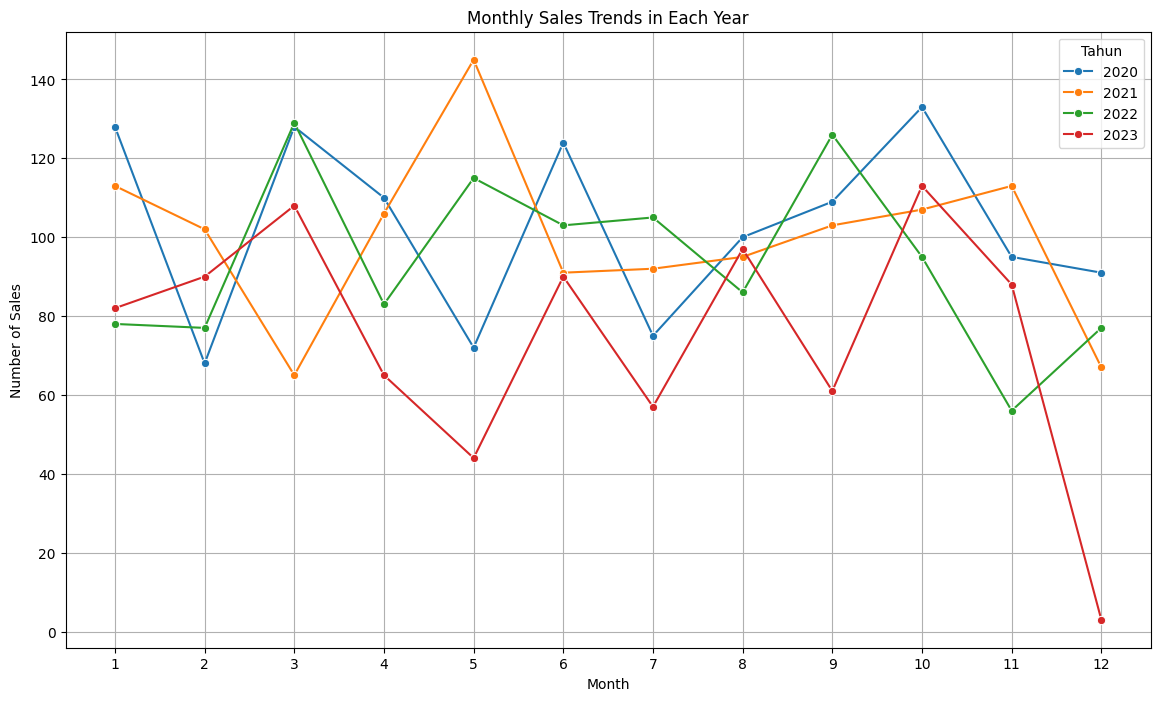

In [107]:
plt.figure(figsize=(14, 8))
palette = sns.color_palette("tab10", n_colors=monthly_sales['Year'].nunique())
sns.lineplot(x='Month', y='Quantity', hue='Year', data=monthly_sales, marker='o', palette=palette)
plt.title('Monthly Sales Trends in Each Year')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.legend(title='Tahun')
plt.xticks(range(1, 13))
plt.show()

In [108]:
#Apakah ada pola penjualan tertentu di hari-hari tertentu dalam seminggu?

cleaned_data['day_of_week'] = cleaned_data['Order_Date'].dt.day_name()
order_counts = cleaned_data['day_of_week'].value_counts()
print(order_counts)

day_of_week
Sunday       147
Monday       140
Friday       137
Wednesday    131
Thursday     126
Tuesday      115
Saturday     112
Name: count, dtype: int64


C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\1631558853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['day_of_week'] = cleaned_data['Order_Date'].dt.day_name()


C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\3137415068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')


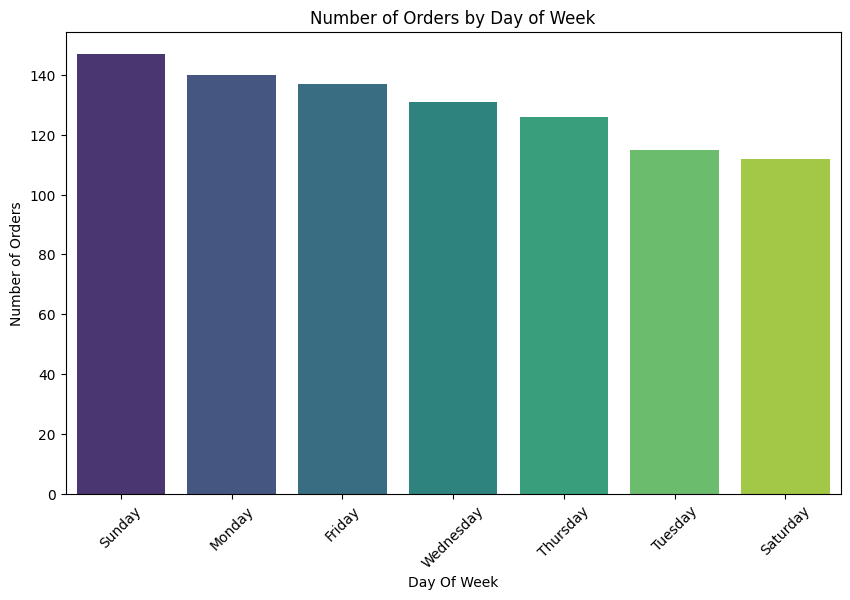

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(x=order_counts.index, y=order_counts.values, palette='viridis')
plt.xlabel('Day Of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week')
plt.xticks(rotation=45)
plt.show()

In [110]:
cleaned_data = data.dropna(subset=['Customer_ID'])

In [111]:
num_of_sales = unique_customers_count = cleaned_data['Customer_ID'].nunique()
num_of_sales

922

In [112]:
#Bagaimana distribusi jumlah pembelian per pelanggan?

num_of_sales = cleaned_data['Customer_ID'].value_counts()
num_of_sales = cleaned_data.groupby('Customer_ID').size().reset_index(name='Purchase_Count')

num_of_sales

,Customer_ID,Purchase_Count
0,003e524c-1457-44d2-9b21-6efc1e649793,1
1,005f978f-4f73-43eb-a8c5-0bff2cce93b9,1
2,0094ddcc-f629-48a6-b4c2-3dfa78fdc001,1
3,014ad241-3027-4269-a5c2-13e26e677e20,1
4,014bde86-8bbe-4919-834a-28bddf91b65d,1
...,...,...
917,fde3fb41-2565-461f-ad26-464b8efa7c5c,1
918,fe092a32-7022-41da-95de-d4df44921bc0,1
919,fed0dd7e-abfe-402e-8065-e36b30311084,1
920,ff0b1b1b-4430-435a-9fa3-7ec9362acc85,1


In [113]:
#Apakah ada pelanggan yang melakukan pembelian lebih dari sekali? Jika ada, siapa pelanggan-pelanggan tersebut?

customers = num_of_sales[num_of_sales['Purchase_Count'] > 1]

print(customers)

Empty DataFrame
Columns: [Customer_ID, Purchase_Count]
Index: []


In [114]:
cleaned_data = data.dropna(subset=['Payment_Method'])

In [115]:
#Apa metode pembayaran yang paling sering digunakan?

payment_methods = cleaned_data['Payment_Method'].value_counts().reset_index()
payment_methods.columns = ['Payment_Method', 'Count']

print(payment_methods)

  Payment_Method  Count
0           Cash    310
1    Credit Card    299
2         PayPal    286


C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\1494654089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Payment_Method', data=payment_methods, palette='viridis')


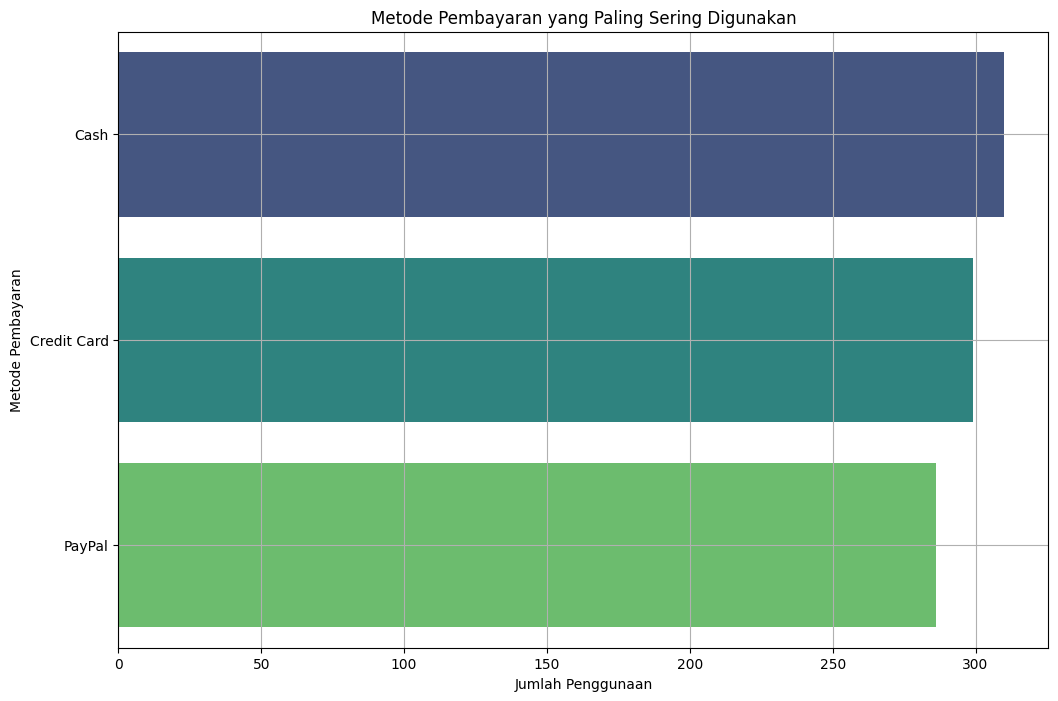

In [116]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Payment_Method', data=payment_methods, palette='viridis')
plt.title('Most Frequently Used Payment Methods')
plt.xlabel('Number of Uses')
plt.ylabel('Payment Methods')
plt.grid(True)
plt.show()

In [117]:
import scipy.stats as stats

In [118]:
#Apakah ada korelasi antara metode pembayaran dan total belanja?

cleaned_data['total_spent'] = cleaned_data['Quantity'] * cleaned_data['Price']
avg_total_spent_by_payment = cleaned_data.groupby('Payment_Method')['total_spent'].mean().reset_index()

C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\1355479744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['total_spent'] = cleaned_data['Quantity'] * cleaned_data['Price']


In [119]:
groups = cleaned_data.groupby('Payment_Method')['total_spent'].apply(list)
anova_result = stats.f_oneway(*groups)


print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

F-statistic: nan, p-value: nan


In [120]:
cleaned_data = data.dropna(subset=['Delivery_Date'])

In [121]:
cleaned_data['Order_Date'] = pd.to_datetime(cleaned_data['Order_Date'])
cleaned_data['Delivery_Date'] = pd.to_datetime(cleaned_data['Delivery_Date'])

C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\4177573593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Order_Date'] = pd.to_datetime(cleaned_data['Order_Date'])
C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\4177573593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Delivery_Date'] = pd.to_datetime(cleaned_data['Delivery_Date'])


In [122]:
#Berapa persentase pesanan yang mengalami keterlambatan pengiriman?

cleaned_data['Delivery_Delay'] = (cleaned_data['Delivery_Date'] - cleaned_data['Order_Date']).dt.days
cleaned_data['Is_Late'] = cleaned_data['Delivery_Delay'] > 2

late_count = cleaned_data['Is_Late'].sum()
on_time_count = (~cleaned_data['Is_Late']).sum()

C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\3751786241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Delivery_Delay'] = (cleaned_data['Delivery_Date'] - cleaned_data['Order_Date']).dt.days
C:\Users\bahfi\AppData\Local\Temp\ipykernel_21676\3751786241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Is_Late'] = cleaned_data['Delivery_Delay'] > 2


In [123]:
total_orders = len(cleaned_data)
late_percentage = (late_count / total_orders) * 100
on_time_percentage = (on_time_count / total_orders) * 100

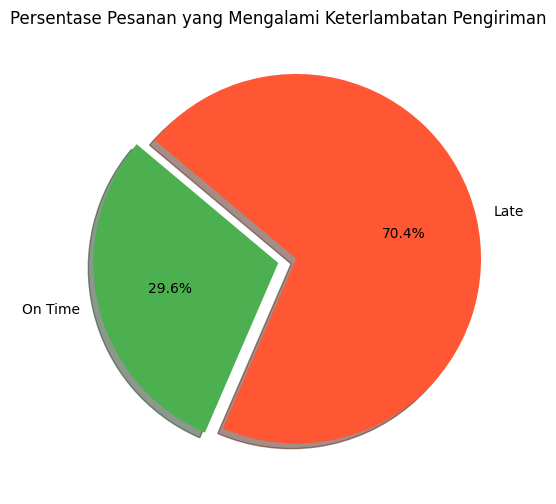

In [124]:
labels = ['On Time', 'Late']
sizes = [on_time_percentage, late_percentage]
colors = ['#4CAF50', '#FF5733']
explode = (0, 0.1)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Order Delivery Percentage')
plt.show()

In [125]:
#Apakah ada pola keterlambatan pengiriman berdasarkan metode pengiriman atau kategori produk?

avg_delay_by_product_category = cleaned_data.groupby('Category')['Is_Late'].mean().reset_index()
avg_delay_by_product_category_sorted = avg_delay_by_product_category.sort_values(by='Is_Late', ascending=False)

print(avg_delay_by_product_category_sorted)

     Category  Is_Late
0    Congress      1.0
340     quite      1.0
305     owner      1.0
304   outside      1.0
303        or      1.0
..        ...      ...
74    college      0.0
239      long      0.0
70     church      0.0
69     choose      0.0
348   receive      0.0

[503 rows x 2 columns]
